In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.12. Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


In [3]:
# Satisfaction from 1 to 10
# Loyalty was measured by th proxies like churn rate, retention rate or customer lifetime value (CLV) 

#### Plotting

Text(0, 0.5, 'Loyalty')

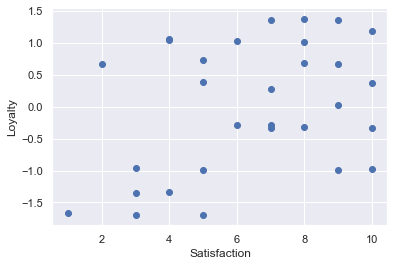

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#### Select the features

In [5]:
x = data.copy()

#### Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### Clustering results

In [7]:
clusters = x.copy()
clusters['clusters_predicted'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

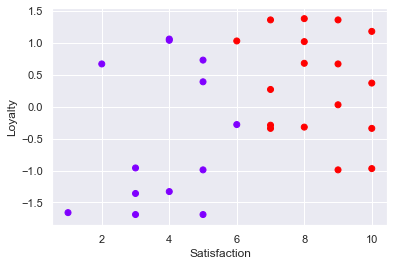

In [8]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['clusters_predicted'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Kmeans only considered satisation as a feature.

We didn't standardised the variables.

The satisafaction values are much higher thn those of loyalty.

kmeans more or less disregarded loyalty as a feature.

How can we fix this problem? By standardising the values.

#### Standarization

In [9]:
from sklearn import preprocessing

In [10]:
x_scaled = preprocessing.scale(x)

In [11]:
### sklearn.preprocessing.scale(x): is a method which standardized each variable(column) seperately.
### (standardizes with mean 0, and standard deviation of 1 by default)

In [12]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#### Elbow method

In [13]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.422667241438837,
 4.315662464700005,
 3.8352787725108954]

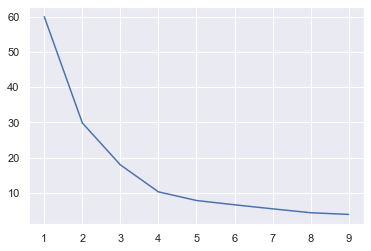

In [14]:
plt.plot(range(1,10), wcss)

In [15]:
### There is no clear tip of the elbow. We can see 3 or 4 tips.

#### Exploring cluster solutions & selecting the number of clusters

In [16]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [17]:
cluster_new

,Satisfaction,Loyalty,Cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


In [18]:
### The above dataframe contains the original values, but the pred values are based on standardization

Text(0, 0.5, 'Loyalty')

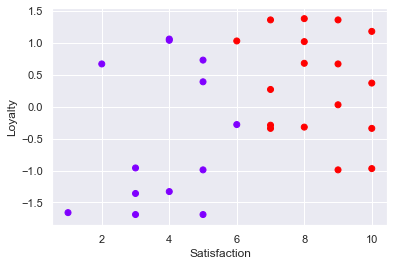

In [19]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['clusters_predicted'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

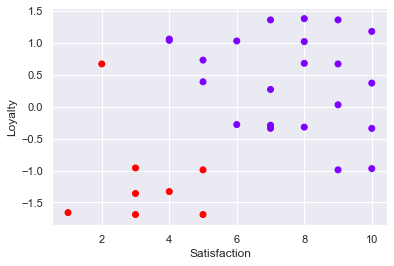

In [20]:
### Graph with standardised values
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [21]:
### Note the difference between the 2 graphs

Text(0, 0.5, 'Loyalty')

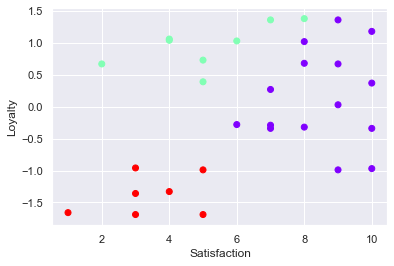

In [22]:
### Let's try it with 3 clusters
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

cluster_new

### Graph with standardised values
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

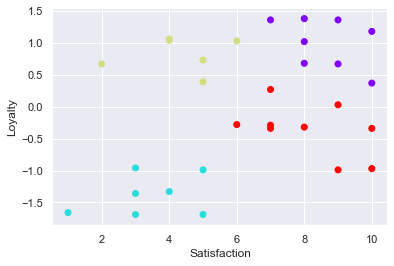

In [23]:
### Let's checkout a 4 cluster solution 
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

cluster_new

### Graph with standardised values
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Text(0, 0.5, 'Loyalty')

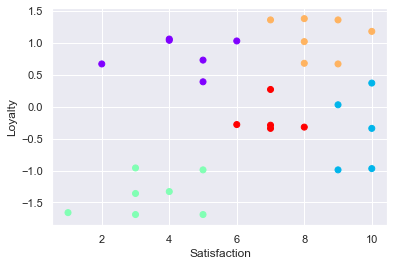

In [24]:
### Let's checkout a 5 cluster solution 
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Cluster_pred'] = kmeans_new.fit_predict(x_scaled)

cluster_new

### Graph with standardised values
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['Cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [25]:
### This solution actually splits the 'roamers' into 2 different clusters. We will use a 4 cluster solution instead.

In [26]:
### 4 & 5 cluster solution are best. Which one you want to you depends on the problem at the hand!